In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 4 Linear Models

Today we are going to cover the univariate (single variable) and multivariate linear regression model in depth:

- Model expression and assumptions
- Model input, output, parameters, and hyper-parameters
- Loss function: measure the performance of the model with given parameters
- Train a linear model: least squares method, normal equation, (batch) gradient descent and stochastic gradient descent

## Dataset: CalCOFI from Kaggle.com

Download bottle.csv from:

https://www.kaggle.com/sohier/calcofi#bottle.csv

- The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. 
- CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.
- Today we are going to use this dataset to investigate the relationship between water salinity and water temperature. In particular, we would like to predict the change of salinity based on water temperature.

In [5]:
# Load datasets
cur_path = os.getcwd()
datapath = cur_path + '/Data/CalCOFI/'
bottle = pd.read_csv(datapath + 'bottle.csv', sep=',')
bottle.head().T

C:\Users\ch002\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
Cst_Cnt,1,1,1,1,1
Btl_Cnt,1,2,3,4,5
Sta_ID,054.0 056.0,054.0 056.0,054.0 056.0,054.0 056.0,054.0 056.0
Depth_ID,19-4903CR-HY-060-0930-05400560-0000A-3,19-4903CR-HY-060-0930-05400560-0008A-3,19-4903CR-HY-060-0930-05400560-0010A-7,19-4903CR-HY-060-0930-05400560-0019A-3,19-4903CR-HY-060-0930-05400560-0020A-7
Depthm,0,8,10,19,20
T_degC,10.5,10.46,10.46,10.45,10.45
Salnty,33.44,33.44,33.437,33.42,33.421
O2ml_L,NaN,NaN,NaN,NaN,NaN
STheta,25.649,25.656,25.654,25.643,25.643
O2Sat,NaN,NaN,NaN,NaN,NaN


### Analyze the dataset

- show column names and data types
- compute descriptive statistics for each variable
- extract 'Salnty' and 'T_degC' for the first 500 rows. (The first 500 row were tested in March, 1949 near California coast.)
- detect and remove missing values
- draw scatter plot and compute correlation coefficient

In [6]:
# Display column names and data types
print('columns:', bottle.columns)
print('data types:', bottle.dtypes)

columns: Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
data types: Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm            

In [7]:
# descriptive statistics of each numerical column
bottle.describe().T

,count,mean,std,min,25%,50%,75%,max
Cst_Cnt,864863.0,17138.790958,10240.949817,1.0000,8269.000000,16848.00000,26557.0000,34404.0000
Btl_Cnt,864863.0,432432.000000,249664.587267,1.0000,216216.500000,432432.00000,648647.5000,864863.0000
Depthm,864863.0,226.831951,316.050259,0.0000,46.000000,125.00000,300.0000,5351.0000
T_degC,853900.0,10.799677,4.243825,1.4400,7.680000,10.06000,13.8800,31.1400
Salnty,817509.0,33.840350,0.461843,28.4310,33.488000,33.86300,34.1969,37.0340
O2ml_L,696201.0,3.392468,2.073256,-0.0100,1.360000,3.44000,5.5000,11.1300
STheta,812174.0,25.819394,1.167787,20.9340,24.965000,25.99600,26.6460,250.7840
O2Sat,661274.0,57.103779,37.094137,-0.1000,21.100000,54.40000,97.6000,214.1000
Oxy_µmol/Kg,661268.0,148.808694,90.187533,-0.4349,60.915470,151.06415,240.3796,485.7018
BtlNum,118667.0,10.497426,6.189688,0.0000,5.000000,10.00000,16.0000,25.0000


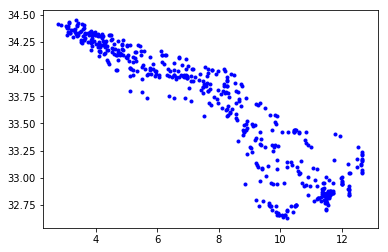

In [9]:
# Extract 'Salnty' and 'T_degC' for the first 500 rows.
# The first 500 row were tested in March, 1949 near California coast
data = bottle[['Salnty', 'T_degC']][:500]
plt.plot(data['T_degC'], data['Salnty'], 'b.')

In [16]:
# data['T_degC'].isna().sum()

AttributeError: 'Series' object has no attribute 'isNA'

In [17]:
data['Salnty'].isnull().sum()

6

In [18]:
data['T_degC'].isnull().sum()

1

In [19]:
print(data.shape)
data = data.dropna()
print(data.shape)

(500, 2)
(493, 2)


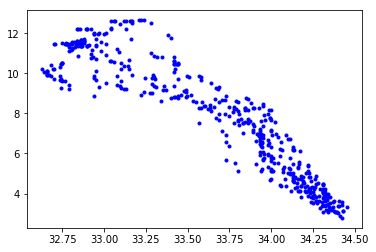

In [20]:
plt.plot(data['Salnty'], data['T_degC'], 'b.')

### Correlation Coefficient
The **Pearson's correlation coefficient** is the covariance of the two variables divided by the product of their standard deviations.

- For a variable $X$ with data set $\{x^{(1)},...,x^{(n)}\}$, its **standard deviation** is calculated as 

$\sigma_X = \sqrt{\sum_{i=1}^n(x^{(i)} - \bar{x})^2}$,

where $\bar{x}$ is the **mean** of $X$,

- For a pair of variables $(X, Y)$ with data set $\{(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})\}$, their **covariance** is calculated as

$cov(X, Y) = \sum_{i=1}^n(x^{(i)} - \bar{x})(y^{(i)} - \bar{y})$.

- The **correlation coefficient** of $X$ and $Y$ is defined as

$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X\sigma_Y}$.

**Questions**:
1. What kind of data set has standard deviation equal to 0?
2. What kind of data set has covariance equal to 0?
3. If the points $(x^{(i)}, y^{(i)})$ are lying on a straight line, what is $\rho_{X, Y}$?

A: if the slope is positive, then correlation coeff = 1; if the slope is negative, the correlation coeff = -1.

4. What data set has $\rho_{X, Y}$ close to 0?

A: When the data spread out and don't have a strong linear relationship.

See https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## Univariate Linear regression: model representation

In order to figure out how to find the line that best fits the data, we need to specify some notations:

n = number of training examples

$x$: "input" variable - water temperature

$y$: "output" variable - water salinity

Pair $(x^{(i)}, y^{(i)})$ corresponds to the $i$-th data instance.

## Hypothesis of linear regression model:
Hypothesis: the relationship between x and y can be described as a straight line.

Mathematical expression:

$y = m\cdot x + b + noise$ 

### How to choose $m$ and $b$?
On average, for a training example $(x,y)$, the value $mx+b$ should be close to the true value $y$.

How to measure closeness of two values? The measurement:

1. should be small when two values are close, large when two values are far apart.
2. easy to compute, easy to minimize (require derivatives)

One good choice: **mean square error (MSE)**

Mathematical expression:

$\min_{m, b}\frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$

The expression to be minimized is called the cost function of the model.

## Example:

x's: {1, 2, 3}

y's: {1.3, 2.25, 3,75}

Q: for $m=0.4$, $b=0.8$, what is the value for the cost function?

Q: How to minimize the cost function?

Method 1: find closed form solution.

Method 2: use gradient descent

Method 3: use stochastic gradient descent

### Training Method 1: Normal Equation for Linear Regression
The vector $z=(m,b)$ can be obtained directly from x's and y's through the following equation:

$z = (X^T X) ^ {-1} X^T y$.

Here each row of $x$ and $y$ represents a training example. In order to reflect the constant term of linear expression, X should include a second column filled with 1.

This formula is call the **normal equation** of linear regression. It generalizes to the multivariate case, where $X$ may have more than one column. Derivation of normal equation can be found here:https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

### Training Method 2: (Batch) Gradient Descent
The analytical method involves solving linear system of equations, which has complexity $O(n^3)$. When the size of data set is large (>1 million), this method is going to take a long time to find the results. Also, not every machine learning model has a formula that directly computes the best values for parameters. *Gradient Descent* is an optimization method that is suitable for most machine learning models.

#### Gradient Descent Algorithm

repeat until converge{

    parameter = paramter - learning rate * gradient
    
}

1. Gradient is the vector of partial derivatives
2. Parameters should be updated simultanously.
3. Stopping criterion: set a maximum number of iteration, or stop when the different between the new cost and the previous cost is less than a threshold (e.g. $10^{-6}$)

For cost function 

$J(m, b) = \frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$,

its gradient is $(\frac{\partial J}{\partial m}, \frac{\partial J}{\partial b})$, and

$\frac{\partial J}{\partial m} = \frac{1}{n}\sum_{i=1}^{n} 2x^{(i)}(mx^{(i)} + b - y^{(i)})$,

$\frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=1}^{n} 2(mx^{(i)} + b - y^{(i)})$.

### Training Method 3: Stochastic Gradient Descent
When the dataset is extremely large (> 1 million samples, each with hundreds of features), even gradient descent algorithm is too costly. Researchers have found that gradient descent will become much more efficient if the gradient and the cost is approximated by that of a single randomly-chosen data example. This variation of gradient descent algorithm is called **stochastic gradient descent** (SGD).

## Visualize Gradient Descent
1. plot the change of the average cost.

2. plot the line after each iteration (use dashed line to represent the initial guess)

3. show the change of parameters on the contour plot.

## Homework

Use each of the four following methods to train a univariate linear regression model on the *data* data frame generated at the beginning of the class:

1. Use LinearRegression() from sklearn.linear_model
2. Apply the normal equation
3. Use batch gradient descent
4. Use stochastic gradient descent

They should all produce the same training result. Visualize the regression line along with training data.